In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import zscore

import string
import nltk
from nltk.corpus import  stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,roc_curve,auc

import joblib

In [2]:
df=pd.read_csv('train_news.csv')
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [3]:
df.shape

(20800, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [5]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [6]:
df=df.drop(columns=["Unnamed: 0","id"], axis=1)

In [7]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['headline', 'written_by', 'news']

 ['label']


In [8]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  1
No of categorical features:  3


In [9]:
for col in cf:
    print(df[col].value_counts(),'\n')

Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                     5
The Dark Agenda Behind Globalism And Open Borders                                                                      5
Las imágenes libres de derechos más destacadas de la semana                                                            4
Michael Moore Owes Me $4.99                                                                                            4
Will Barack Obama Delay Or Suspend The Election If Hillary Is Forced Out By The New FBI Email Investigation?           4
                                                                                                                      ..
Franken: I’ll Still Appear With Griffin, Picture Was ’Horrible Mistake’ - Apology Was ’The Right Thing’ - Breitbart    1
Pentagon Releases Photo to Rebut Contention It Bombed a Mosque - The New York Times                                    1
Newsticker (979)                

Name: news, Length: 20386, dtype: int64 



In [10]:
for col in nf:
    print(col,' : ',df[col].nunique())

label  :  2


In [11]:
df=df.drop_duplicates(subset="headline")
df=df.drop_duplicates(subset="news")
df=df.replace(np.NaN, 'None')
df = df.reset_index(drop=True)
df

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...
19505,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0
19506,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
19507,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
19508,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [12]:
df.isnull().sum()

headline      0
written_by    0
news          0
label         0
dtype: int64

In [13]:
print ('Real and fake counts','\n',df.label.value_counts())

Real and fake counts 
 0    10381
1     9129
Name: label, dtype: int64


In [14]:
print ('Fake ratio = ', round(len(df[df['label']==1]) / len(df['label']),2)*100,'%')
print ('Real ratio  = ', round(len(df[df['label']==0]) / len(df['label']),2)*100,'%')

Fake ratio =  47.0 %
Real ratio  =  53.0 %


In [15]:
#New column for Length of message
df['length'] = df.news.str.len()
df

,headline,written_by,news,label,length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9164
...,...,...,...,...,...
19505,One Police Shift: Patrolling an Anxious Americ...,The New York Times,Policing in America today is a rib dinner paid...,0,19894
19506,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1,6621
19507,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1,3433
19508,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0,2334


In [16]:
df['news'] = df['news'].str.lower()

In [17]:
# Replace email addresses with 'email'
df['news'] = df['news'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['news'] = df['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['news'] = df['news'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['news'] = df['news'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')   

# Replace numbers with 'numbr'
df['news'] = df['news'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [18]:
# Remove punctuation
df['news'] = df['news'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between teemlrms with a single space
df['news'] = df['news'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['news'] = df['news'].str.replace(r'^\s+|\s+?$', '')

In [19]:
df.head()

,headline,written_by,news,label,length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,washington in sonny perdue s telling georgians...,0,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,houston venezuela had a plan it was a tactical...,0,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,sunday on abc s this week while discussing the...,0,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,augusta me the beleaguered republican governor...,0,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,finian cunningham has written extensively on i...,1,9164


In [20]:
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
            result.append(lemmatize_stemming(token))        
    return result

In [21]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['news'] = df['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

df['news'] = preprocess(df['news'])

In [22]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.news.str.len()
df.head()

,headline,written_by,news,label,length,clean_length
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,washington sonny perdue telling georgians grow...,0,7936,5523
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,houston venezuela plan tactical approach desig...,0,6112,4162
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,sunday abc week discussing republican plan rep...,0,425,269
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,augusta beleaguered republican governor maine ...,0,6516,4411
4,A Digital 9/11 If Trump Wins,Finian Cunningham,finian cunningham written extensively internat...,1,9164,6725


In [23]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 91687251
Clean Length 63651967


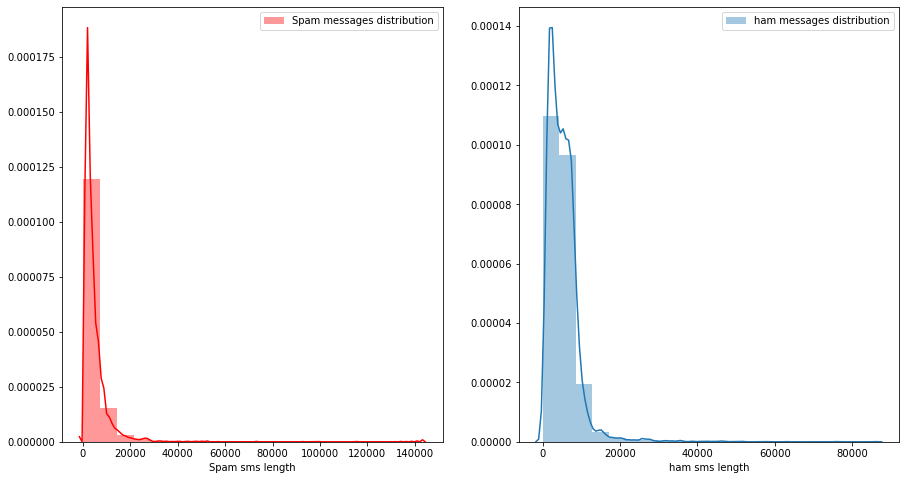

In [24]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label'] == 1]['length'],bins=20,ax=ax[0],label = 'Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label'] == 0]['length'],bins=20,ax=ax[1],label = 'ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

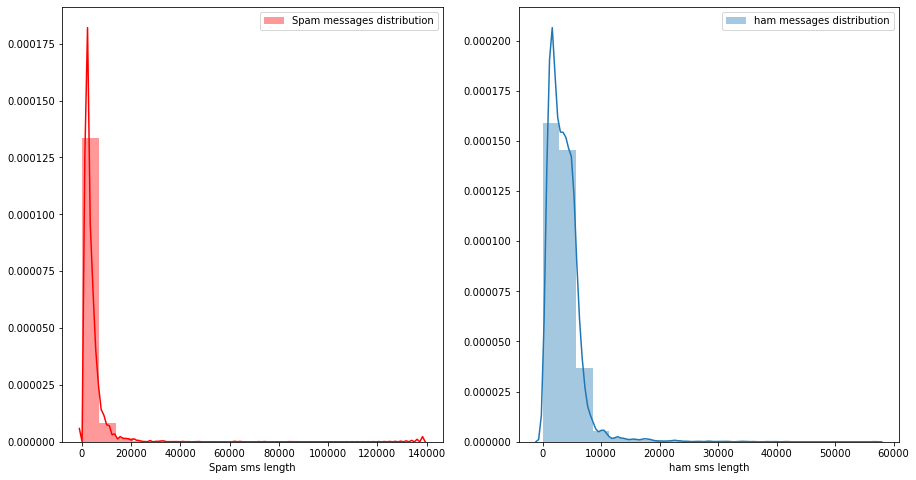

In [25]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label'] == 1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['label'] == 0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

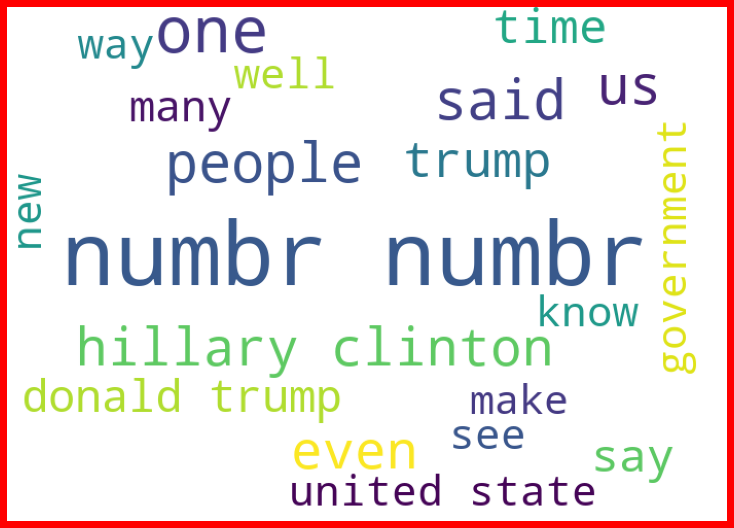

In [26]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud

spams = df['news'][df['label'] == 1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

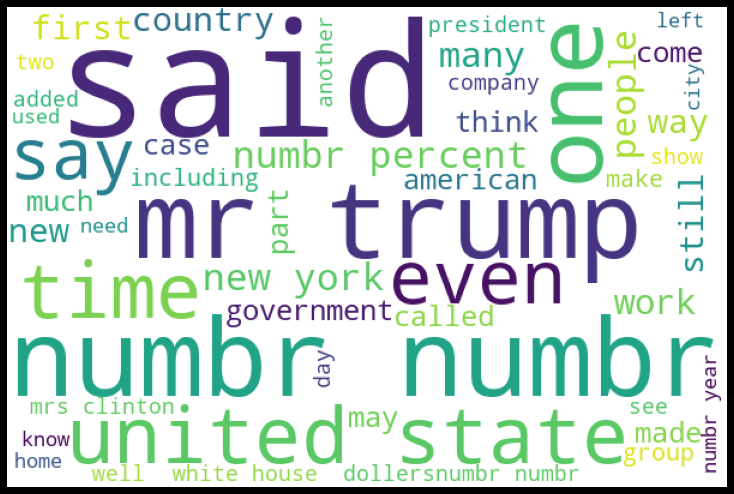

In [27]:
#Getting sense of loud words in ham 

hams = df['news'][df['label'] == 0]
spam_cloud = WordCloud (width=600, height=400, background_color='white', max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [28]:
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform (df['news'])

x = features
y = df['label']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)  

In [30]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(13071, 177122) (6439, 177122)
(13071,) (6439,)


In [31]:
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [32]:
models = []
models.append(('MultinomialNB', MNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))

*********************** MultinomialNB ***********************


MultinomialNB()


Accuracy_score =  0.8036962261220686


roc_auc_score =  0.7871677438082562


classification_report
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      3474
           1       0.99      0.58      0.73      2965

    accuracy                           0.80      6439
   macro avg       0.86      0.79      0.79      6439
weighted avg       0.85      0.80      0.79      6439



[[3461   13]
 [1251 1714]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** RandomForestClassifier ***********************


RandomForestClassifier()


Accuracy_score =  0.9206398509085262


roc_auc_score =  0.917657695179124


classification_report
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      3474
           1       0.94      0.88      0.91      2965

    accuracy                           0.92      64

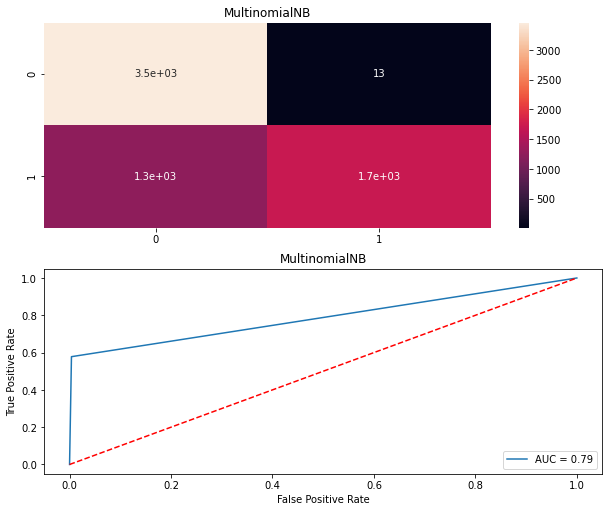

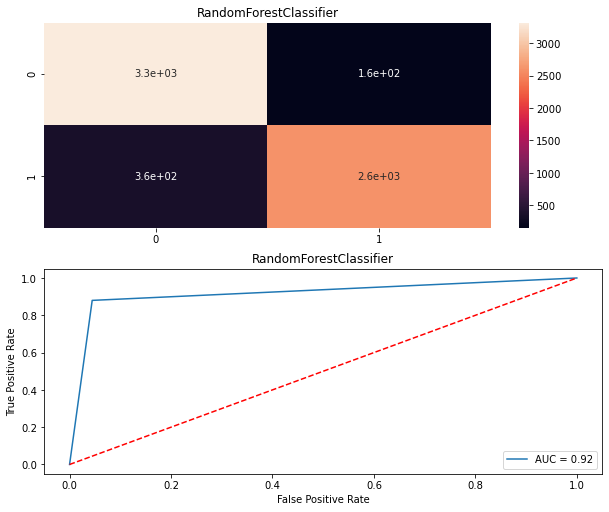

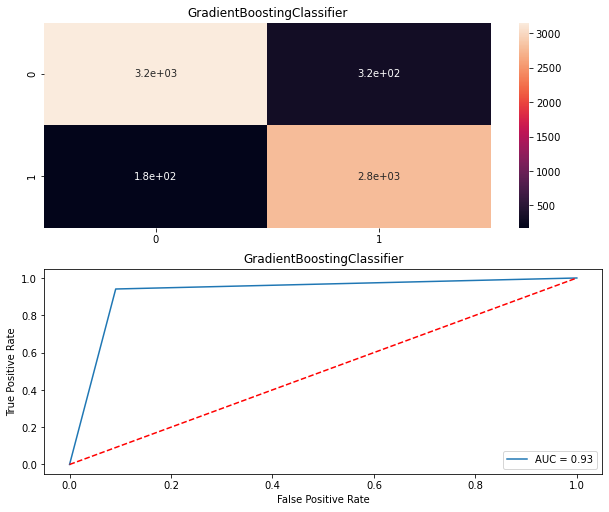

In [33]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    #sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    #print('Cross_Val_Score = ',sc)
    #cvs.append(sc*100)
    #print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [34]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Rou_auc_score':rocscore})
result

,Model,Accuracy_score,Rou_auc_score
0,MultinomialNB,80.369623,78.716774
1,RandomForestClassifier,92.063985,91.765770
2,GradientBoostingClassifier,92.374592,92.500832


In [36]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}

grid = RandomizedSearchCV ( estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
                            param_distributions = param_test2, scoring='roc_auc',n_jobs=4, iid=False, cv=5)

# Fit the random search model
grid.fit(x,y)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(max_features='sqrt',
                                                        n_estimators=60,
                                                        random_state=10,
                                                        subsample=0.8),
                   iid=False, n_jobs=4,
                   param_distributions={'max_depth': range(5, 16, 2),
                                        'min_samples_split': range(200, 1001, 200)},
                   scoring='roc_auc')

In [37]:
print(grid)
#print(grid.best_score)
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(max_features='sqrt',
                                                        n_estimators=60,
                                                        random_state=10,
                                                        subsample=0.8),
                   iid=False, n_jobs=4,
                   param_distributions={'max_depth': range(5, 16, 2),
                                        'min_samples_split': range(200, 1001, 200)},
                   scoring='roc_auc')
GradientBoostingClassifier(max_depth=15, max_features='sqrt',
                           min_samples_split=600, n_estimators=60,
                           random_state=10, subsample=0.8)
{'min_samples_split': 600, 'max_depth': 15}
0.9786495519297006


In [39]:
GBC=GradientBoostingClassifier(max_depth=15, max_features='sqrt',
                           min_samples_split=600, n_estimators=60,
                           random_state=10, subsample=0.8)
GBC.fit(x_train,y_train)
pred=GBC.predict(x_test)

In [40]:
pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [41]:
y_test

14712    0
8176     0
4101     1
15366    0
14731    0
        ..
17543    0
14709    1
7696     0
19142    1
5414     0
Name: label, Length: 6439, dtype: int64

In [42]:
print( accuracy_score(y_test, pred) )

0.922037583475695


In [43]:
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
print('\n')
print('classification_report\n',classification_report(y_test,pre))
print('\n')
cm=confusion_matrix(y_test,pre)
print(cm)



roc_auc_score =  0.9250083249113384


classification_report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      3474
           1       0.90      0.94      0.92      2965

    accuracy                           0.92      6439
   macro avg       0.92      0.93      0.92      6439
weighted avg       0.92      0.92      0.92      6439



[[3158  316]
 [ 175 2790]]


In [44]:
joblib.dump(GBC,'fake_news.pkl')

['fake_news.pkl']

In [45]:
model=joblib.load('Fake_news.pkl')

In [46]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)